In [ ]:
# Installeer de bibliotheek pyserial eenmalig, zet er daarna een hekje/hash-teken voor.
!pip install pyserial
import serial
import matplotlib.pyplot as plt
import time
import serial.tools.list_ports

print("Make sure you have the Arduino uploaded with Arduino-readAnalog_met_tijd.ino, ")
print("the Arduino is connected, and the serial port is not in use.")
print("")

# Search for the USB port
ports = list(serial.tools.list_ports.comports())
if not ports:
    print("no USB-device found...")
    print("possible connection or driver problem")
    print("")
    port = "NOT FOUND"
else:
    for p in ports: #find all serial device ports in use (usually one)
        port = p.device
        print("The Arduino is probably connected to "+ port)

print("(press Enter for defaults:)")

# Serial port settings
serial_port_str = input("Enter the serial port, if different than "+ port+ " :" )
# Use the default value if the user presses Enter without typing anything
serial_port = serial_port_str if serial_port_str else port

# Ask the user for the communication speed of the Arduino (baudrate)
baud_rate_str = input("Enter the baud_rate, default 500000 (check arduino code, standard 9600 slow): ")
baud_rate = int(baud_rate_str) if baud_rate_str else 500000

# Ask the user for the max number of data points
max_data_points_str = input("Enter the max. number of data points, default 100000: ")
max_data_points = int(max_data_points_str) if max_data_points_str else 100000

# Ask the user for the number of seconds to record
max_time_str = input("Enter the record duration in seconds, default 10: ")
max_time = int(max_time_str) if max_time_str else 10

print("(whatever comes first)")

# Lists to record data
data = []  # data is recorded first in this array, and then split in the followin arrays:
tijden = []
voltage_data = []

# Create a serial connection
ser = serial.Serial()
ser.baudrate=baud_rate
ser.port=serial_port
while True:
    try:
        ser.close()
        time.sleep(1)
        ser.open()
        print("Serial opened")
        time.sleep(1)
        read=ser.readline() # test the first line of data
        #print(read.decode('utf-8'))
        print("Busy collecting data...")
        starttime = time.perf_counter_ns() #record the starttime
        break  # Exit this loop if start is successfull
    except:
        print("Failed to start or read serial. Retrying in 1 second...")
        time.sleep(1)  # Wait for 1 second before retrying

# Record data
while True:
    try:
        if ser.in_waiting > 0:
            line = ser.readline().decode().strip() # cleanup incoming data
            #print(line) #this shows all incoming data
            if line:
                data.append(line) # add to list with all incoming lines
            # Check if max time of the recording OR max. data points is recorded, then stop recording and plot
            if (time.perf_counter_ns()-starttime)/1000000000 >= max_time or len(data) >= max_data_points:
                break
    except UnicodeDecodeError:
        continue
    except Exception as e:
        print(f"Exception occurred: {str(e)}")
        break

ser.close()  # Close the serial connection
print('Data collection finished!')

# Split and strip the data in lists
for line in data:
    try:
        # Split the line based on commas
        data = line.split(';')

        # Parse the values
        t = float(data[0])  # First value (e.g., 40.5)
        Flux = int(data[1])    # Second value (e.g., 0)

        # Check if values has at least two elements
        #if len(values) >= 2:
        #    t = int(values[0].split(':')[1].strip())
        #    voltage = float(values[1].split(':')[1].strip())

            # Add values to lists
        tijden.append(t)
        voltage_data.append(Flux)
    except ValueError as ve:
        print(f"ValueError occurred: {str(ve)}")
        continue  # Skip to the next iteration of the loop

if tijden:
    # Make the list tijden start at zero
    # By subtracting the first value from each subsequent t value
    adjusted_tijden = [t - tijden[0] for t in tijden]

    # Calculate sample frequency
    sample_freq=(len(data)/adjusted_tijden[-1]*1000) # -1 is last value in list
    print("")
    print("Sample frequency = " + str(round(sample_freq)) + " Hz")
    if sample_freq < 0:
        print("something went wrong, please reconnect USB plug, or use a different Arduino")

    # Plot the data
    plt.figure(figsize=(5,5))
    plt.plot(adjusted_tijden, voltage_data,'r') # r staat voor red
    plt.title('De lichtflux als functie van tijd')
    plt.xlabel('tijd [s]')
    plt.ylabel('Flux [-]')
    plt.grid()
else:
    print("No data points collected.")

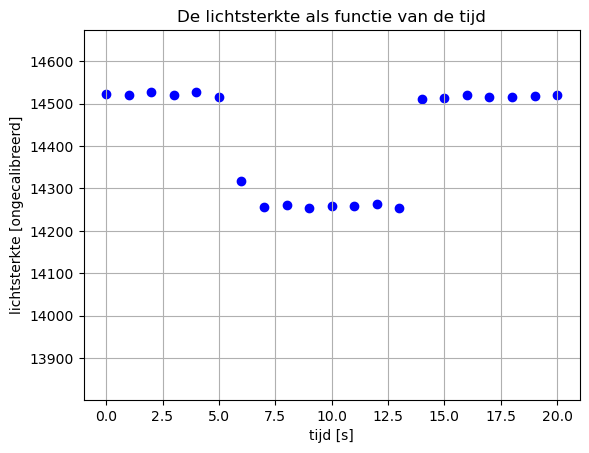

Data acquisition has ended, please restart & clear kernel for next try.
You can save your plot image by right-clicking.


In [16]:
# Installeer de bibliotheek pyserial eenmalig, zet er daarna een hekje/hash-teken voor.
#!pip install pyserial
import serial
import matplotlib.pyplot as plt
import numpy as np
import time
import serial.tools.list_ports
from IPython.display import display, clear_output


print("Make sure you have the Arduino uploaded with the right .ino")
print("data serial output must be in the form of seconds+1decimal;data for example: 40.5;12456")
print("the Arduino is connected, and the serial port is not in use.")
print("")

# Search for the USB port
ports = list(serial.tools.list_ports.comports())
if not ports:
    print("no USB-device found...")
    print("possible connection or driver problem")
    print("")
    port = "NOT FOUND"
else:
    for p in ports: #find all serial device ports in use (usually one)
        port = p.device
        print("The Arduino is probably connected to "+ port)

print("(press Enter for defaults:)")

# Serial port settings
serial_port_str = input("Enter the serial port, if different than "+ port+ " :" )
# Use the default value if the user presses Enter without typing anything
serial_port = serial_port_str if serial_port_str else port

# Ask the user for the communication speed of the Arduino (baudrate)
baud_rate_str = input("Enter the baud_rate, default 9600: ")
baud_rate = int(baud_rate_str) if baud_rate_str else 9600

# Ask the user for the max number of data points
max_data_points_str = input("Enter the max. number of data points, default 100000: ")
max_data_points = int(max_data_points_str) if max_data_points_str else 100000

# Ask the user for the number of seconds to record
max_time_str = input("Enter the record duration in seconds, default 25: ")
max_time = int(max_time_str) if max_time_str else 25

print("(whatever comes first)")

# Lists to record data
values1 = []
values2 = []


# Create a serial connection
ser = serial.Serial()
ser.baudrate=baud_rate
ser.port=serial_port
while True:
    try:
        ser.close()
        time.sleep(1)
        ser.open()
        print("Serial opened")
        time.sleep(1)
        read=ser.readline() # test the first line of data
        #print(read.decode('utf-8'))
        print("Busy collecting data...")
        starttime = time.perf_counter_ns() #record the starttime
        break  # Exit this loop if start is successfull
    except:
        print("Failed to start or read serial. Retrying in 1 second...")
        time.sleep(1)  # Wait for 1 second before retrying

        
# Set up the plot
plt.figure()
plt.ion()  # Interactive mode on

# Infinite loop to read data from the serial port and plot it
while True:
    if ser.in_waiting > 0:
        line = ser.readline().decode('utf-8').strip()  # Read a line of data and decode it
        
        try:
            # Split the line by semicolon
            data = line.split(';')
            
            # Parse the values
            value1 = float(data[0])  # First value (e.g., 40.5)
            value2 = int(data[1])    # Second value (e.g., 0)

            # Append the values to lists
            values1.append(value1)
            values2.append(value2)

            # Clear the previous output to avoid plotting over the old data
            clear_output(wait=True)
            plt.clf
            
            # Plot the updated data
            plt.scatter(range(len(values1)), values2, c='blue')
            plt.title('De lichtsterkte als functie van de tijd')
            plt.xlabel('tijd [s]')
            plt.ylabel('lichtsterkte [ongecalibreerd]')
            plt.ylim(np.max(values2)*0.95, np.max(values2)*1.01)
            plt.grid()
            
            # Show the plot
            #display(plt.gcf())  # Display the updated figure
            
            plt.pause(0.1)  # Pause to allow the plot to refresh
                                   
            if (time.perf_counter_ns()-starttime)/1000000000 >= max_time or len(values2) >= max_data_points:
                print("Data acquisition has ended, please restart & clear kernel for next try.")
                print("You can save your plot image by right-clicking.")
                break
        
        except (ValueError, IndexError):
            # Handle any parsing errors
            print("Invalid data received:", line)
